In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Read in train data
marathon = pd.read_csv(r'Final_Mara_attr_times.csv')
marathon.fillna(-1, inplace=True)
#prepare data for in sample prediction
y = marathon['Results']
X = marathon.iloc[:,1:]
#prepare test data for oos prediction
marathon_test = pd.read_csv(r'2021_final.csv')
marathon_test['Previous marathons'].fillna(0, inplace=True)
marathon_test.fillna(-1, inplace=True)
marathon_test.drop('Unnamed: 0', axis = 1, inplace = True)
marathon_test.rename({'age': 'Age', 'weight': 'Weight', 'height': 'Height', 'Value': 'GDP', 'Time': 'Results'}, axis = 1, inplace=True)
y_test = marathon_test['Results']
X_test = marathon_test.drop('Results', axis = 1)
print(X)
print(X_test)

      Year  Age  Previous marathons           GDP  Weight  Height  Last Time
0     2014   37                   5  6.144535e+10    -1.0    -1.0     7425.0
1     2013   37                   5  5.509734e+10    -1.0    -1.0     7610.0
2     2012   37                   5  5.041275e+10    -1.0    -1.0       -1.0
3     2015   37                   5  6.376754e+10    -1.0    -1.0     7377.0
4     2013   37                   5  5.509734e+10    -1.0    -1.0     7456.0
...    ...  ...                 ...           ...     ...     ...        ...
996   2010   35                   1  2.018650e+10    -1.0    -1.0       -1.0
997   2012   35                   1  6.203213e+12    -1.0    -1.0       -1.0
998   1999   59                   1  1.289601e+10    -1.0    -1.0       -1.0
999   2010   33                   1  2.993379e+10    -1.0    -1.0       -1.0
1000  2011   45                   1  4.195343e+10    -1.0    -1.0       -1.0

[1001 rows x 7 columns]
    Age  Height  Weight  Year           GDP  Previo

In [3]:
X.head()

,Year,Age,Previous marathons,GDP,Weight,Height,Last Time
0,2014,37,5,6.144535e+10,-1.0,-1.0,7425.0
1,2013,37,5,5.509734e+10,-1.0,-1.0,7610.0
2,2012,37,5,5.041275e+10,-1.0,-1.0,-1.0
3,2015,37,5,6.376754e+10,-1.0,-1.0,7377.0
4,2013,37,5,5.509734e+10,-1.0,-1.0,7456.0


In [4]:
X['Last Time'].describe()

count    1001.000000
mean     4450.256743
std      3755.888145
min        -1.000000
25%        -1.000000
50%      7536.000000
75%      7643.000000
max      7705.000000
Name: Last Time, dtype: float64

In [4]:
#read in model
gb_mod = pd.read_pickle(r'gb_model.pkl')

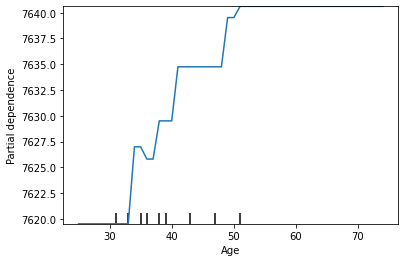

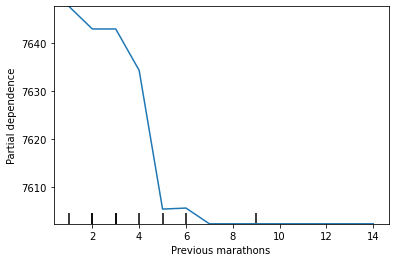

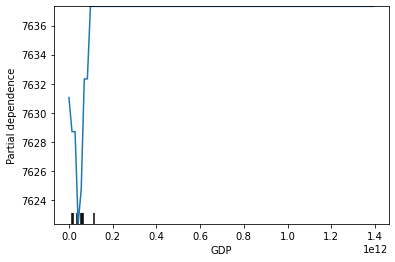

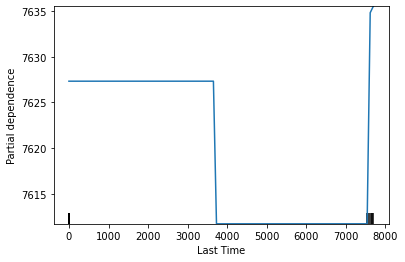

In [6]:
#get partial dependence plots
PartialDependenceDisplay.from_estimator(gb_mod, X, [1])
PartialDependenceDisplay.from_estimator(gb_mod, X, [2])
PartialDependenceDisplay.from_estimator(gb_mod, X, [3])
PartialDependenceDisplay.from_estimator(gb_mod, X, [6])

In [10]:
#compare test rmse and test standard deviation
pred = gb_mod.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(np.sqrt(mse))
print(np.std(y_test))

774.9798679342109
363.48891854610525


C:\Users\ritch\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [11]:
#find test bias
np.mean(pred - y_test)

-685.3535174270559

In [8]:
#get train oos rmse and train standard deviation
pred = gb_mod.predict(X)
mse = mean_squared_error(y, pred)
print(np.sqrt(mse))
print(np.std(y))

55.916330515231905
64.53606116517635


In [8]:
#Get train in sample rmse and variable importance
print(gb_mod.best_score_)
print(gb_mod.best_estimator_.feature_importances_)
print(gb_mod.best_estimator_.feature_names_in_)

-58.91980066100441
[0.10581701 0.15108714 0.48544842 0.06408899 0.00256487 0.0182144
 0.17277917]
['Year' 'Age' 'Previous marathons' 'GDP' 'Weight' 'Height' 'Last Time']
